# 2A. Data Exploration: Airbnb Listings
<hr/>

We will now explore the data to get a better understanding of the relationship between the observations as well as the relationship between each observation and predictor.

1. Check for collinearity among the features
2. Visualize relationship between each predictor and price
3. Visualize the target variable to identify any skewness and any necessary transformations
4. Visualize the supply of Airbnb homes by location

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Masters Project/datasets/clean_datasets/')

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
%matplotlib inline

In [0]:
data = pd.read_csv(r'/content/drive/My Drive/Masters Project/datasets/clean_datasets/listings_clean.csv')

We will use the scatter_matrix function in Pandas to visualize a matrix of each predictor as a function of another which is useful to check for any collinearity among the predictors. The cells running through the diagonal of the matrix contain a histogram with its values on the X axis.

Listings Data Exploration

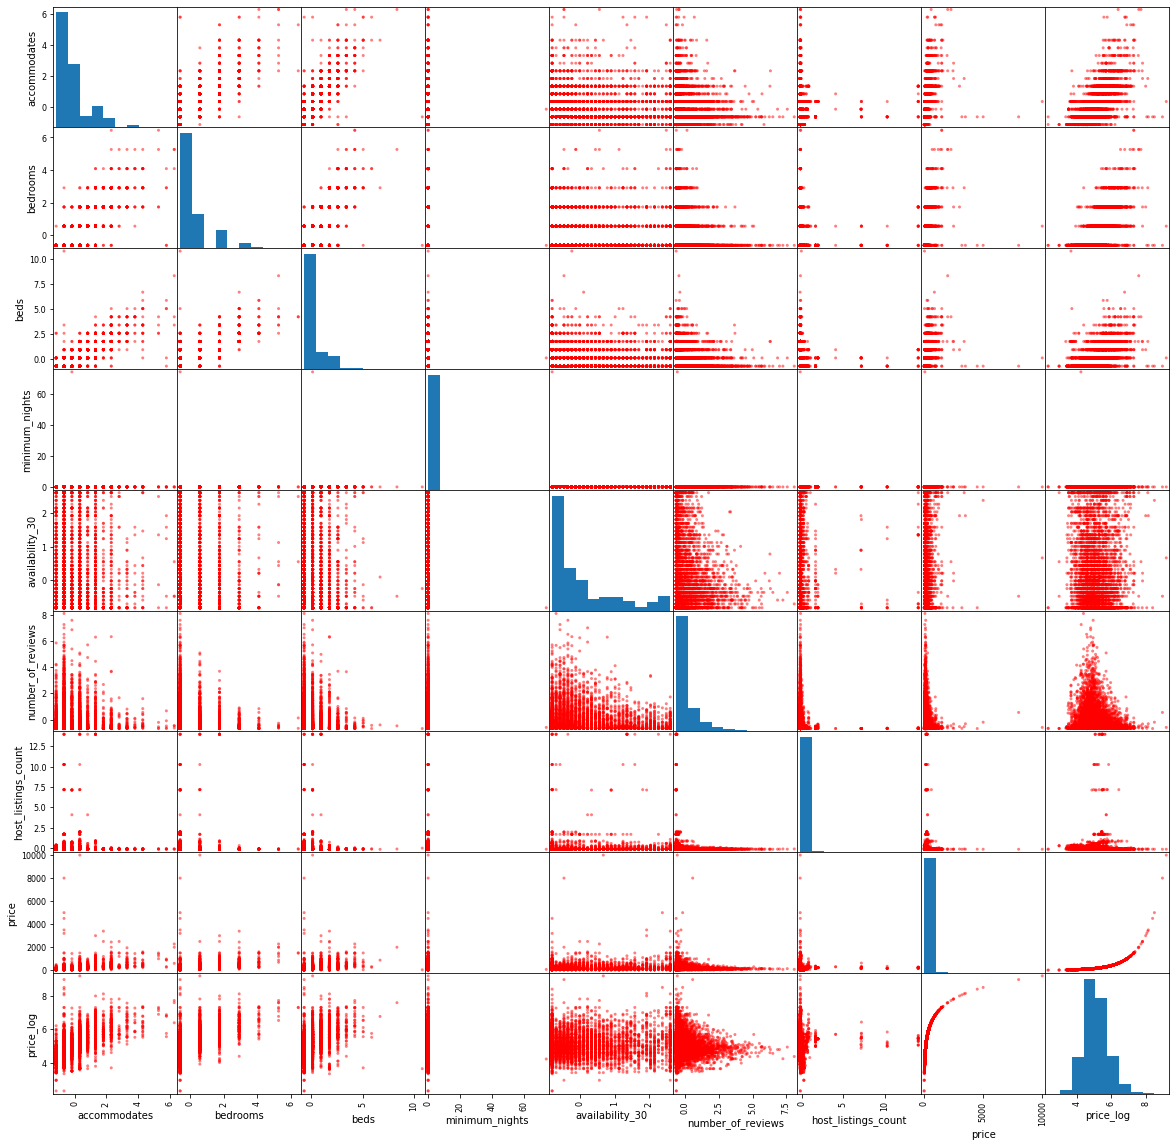

In [5]:
# check for collinearity and visualize relationship between each predictor and price
from pandas.plotting import scatter_matrix
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30','number_of_reviews', 'host_listings_count', 'price', 'price_log']
axs = scatter_matrix(data[matrix_cols], figsize=(20, 20), c='red')

In [6]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data[matrix_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,accommodates,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listings_count,price,price_log
accommodates,1,0.82,0.84,-0.0022,-0.03,-0.12,-0.00058,0.43,0.64
bedrooms,0.82,1,0.81,-0.0083,-0.038,-0.18,0.0028,0.44,0.64
beds,0.84,0.81,1,0.0016,-0.022,-0.13,-0.014,0.36,0.52
minimum_nights,-0.0022,-0.0083,0.0016,1,-0.011,-0.0082,-0.0021,-0.0072,-0.017
availability_30,-0.03,-0.038,-0.022,-0.011,1,-0.087,0.024,0.049,-0.02
number_of_reviews,-0.12,-0.18,-0.13,-0.0082,-0.087,1,-0.086,-0.13,-0.17
host_listings_count,-0.00058,0.0028,-0.014,-0.0021,0.024,-0.086,1,-0.0071,0.025
price,0.43,0.44,0.36,-0.0072,0.049,-0.13,-0.0071,1,0.71
price_log,0.64,0.64,0.52,-0.017,-0.02,-0.17,0.025,0.71,1


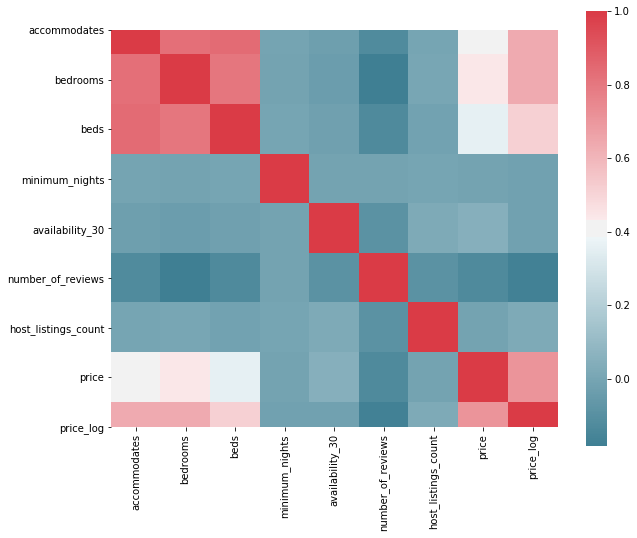

In [8]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data[matrix_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [0]:
!pip install -q geopandas

     |████████████████████████████████| 921kB 8.9MB/s 
     |████████████████████████████████| 11.8MB 190kB/s 
     |████████████████████████████████| 10.1MB 36.6MB/s 


In [0]:
'''Importing Data Manipulation Modules'''
import numpy as np                 
import pandas as pd               
import matplotlib                  
import matplotlib.pyplot as plt
import seaborn as sns              
import geopandas as gpd            
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly               
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

In [0]:
data = pd.read_csv(r'/content/drive/My Drive/Masters Project/datasets/clean_datasets/neighborhood_clustered_clean.csv')

In [0]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,neighborhood
0,958,1169,1.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,170.0,1,1,199,95-100,Haight Hayes Valley
1,3850,4921,2.0,House,Private room,2,1.0,1.0,1.0,Real Bed,99.0,1,17,136,90-94,Park Merced Twin Peaks
2,5858,8904,2.0,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,235.0,30,0,111,95-100,Mission Bernal Heights
3,7918,21994,10.0,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,65.0,32,5,17,85-89,Haight Hayes Valley
4,8142,21994,10.0,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,65.0,32,30,8,90-94,Haight Hayes Valley


In [0]:
data = data[['id','host_id','neighborhood']]

In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
neighborhood,0,0.0
host_id,0,0.0
id,0,0.0


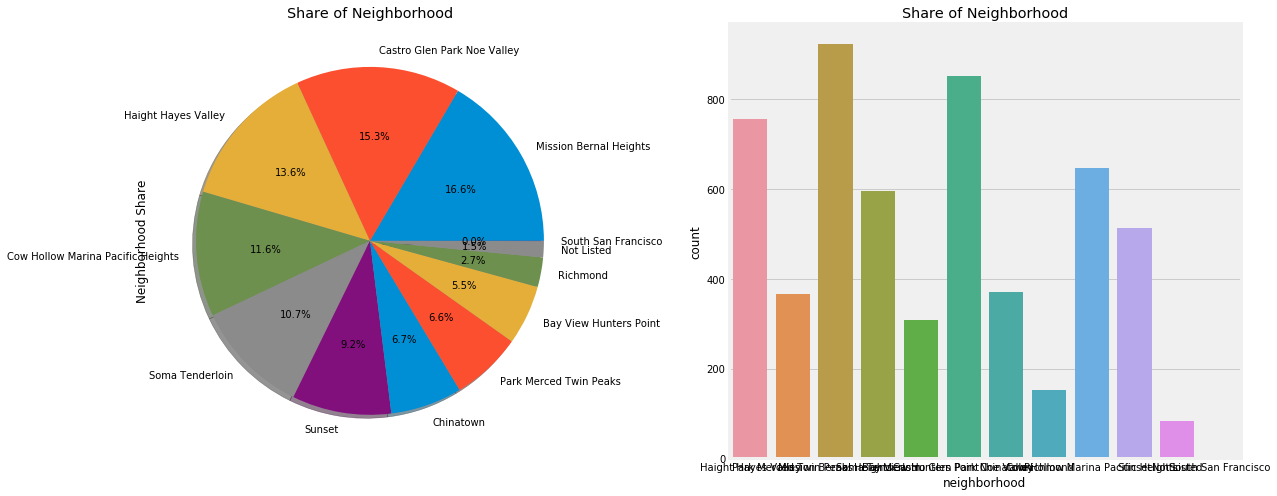

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['neighborhood'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighborhood',data=data,ax=ax[1])
ax[1].set_title('Share of Neighborhood')
plt.show()

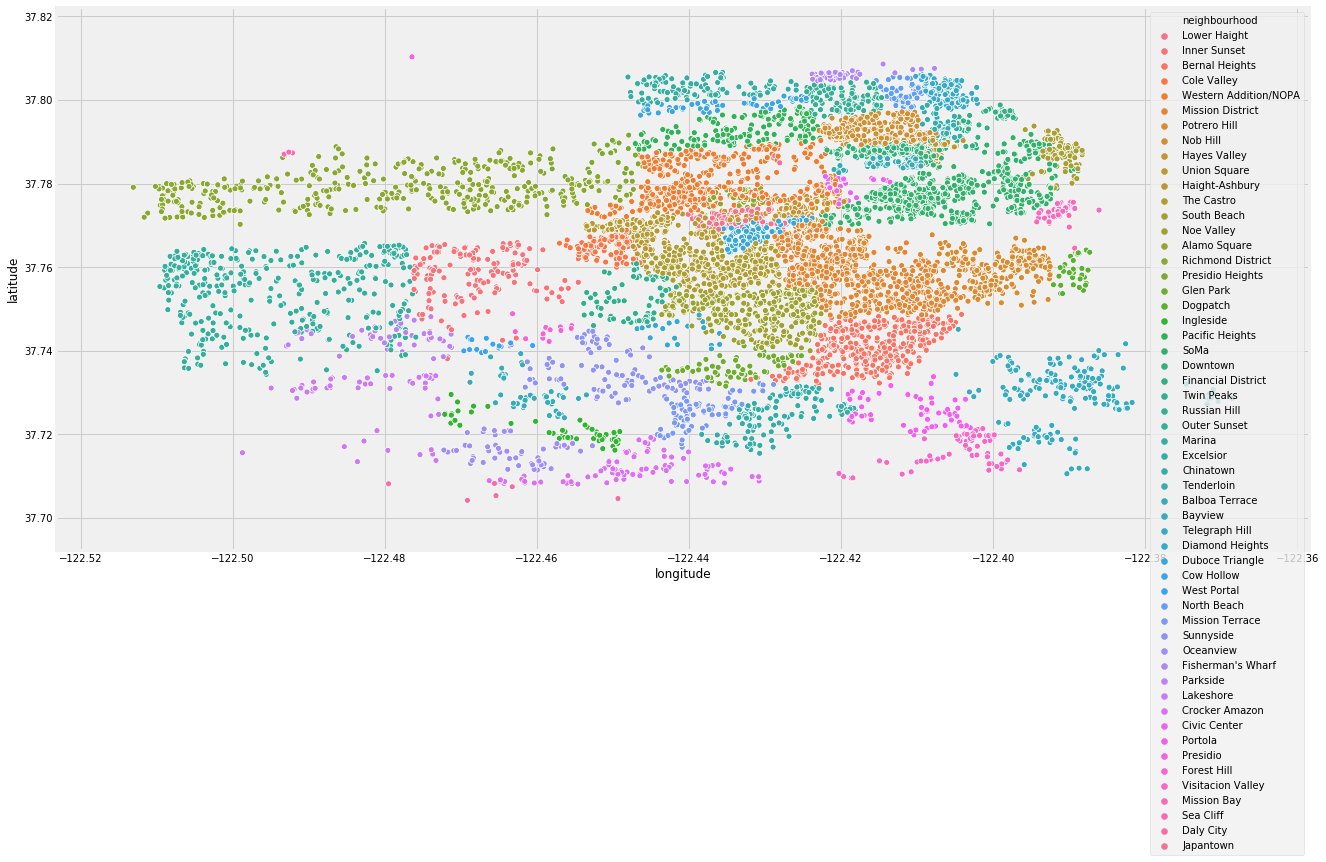

In [0]:
plt.figure(figsize=(20,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood)
plt.ioff()

**Lets See the Hotel Distribution in a Heat Map**

In [0]:
import folium
from folium.plugins import HeatMap
m=folium.Map([37.7749,-122.4194],zoom_start=11)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)